## 在Iris数据集上可视化

In [8]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

### 准备数据

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data).rename(columns={0: 'SepalLengthCm',1:'SepalWidthCm',2:'PetalLengthCm',3:'PetalWidthCm'})
y = pd.DataFrame(iris.target).rename(columns={0: 'Species'})
X['id'] = range(1,151)
y['id'] = range(1,151)
iris = pd.merge(X,y,how='left',on='id')
iris.head()
cols = iris.columns.tolist()
cols = cols[4:5] + cols[0:4] + cols[5:]
iris = iris[cols]

In [3]:
iris.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### 看每一种类有多少个

In [5]:
iris["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

### 使用数据框的.plot，画散点图

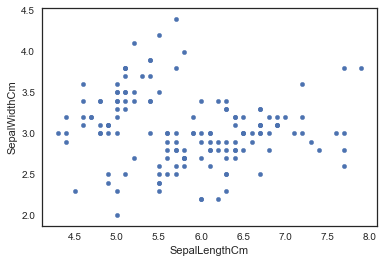

In [9]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

### 也可以使用seaborn得到一个类似的结果

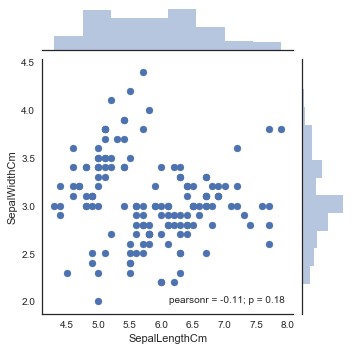

In [10]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

### 上面所绘图中看不出种类，使用seaborn's FacetGrid按种类颜色画散点图

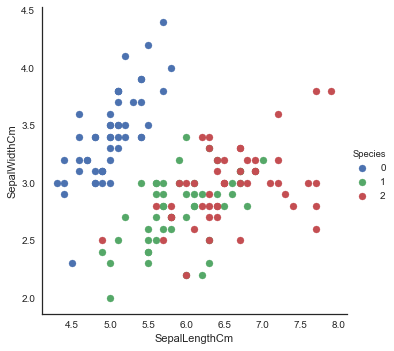

In [11]:
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

### 通过箱线图观察每个特征的分布情况

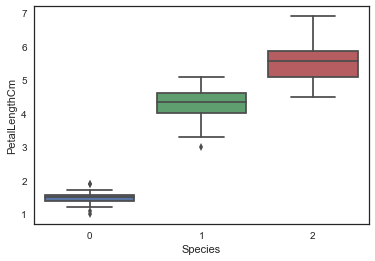

In [12]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

### 使用Seaborn's stripplot扩展箱线图
### 设置jitter=True使得样本点不会落在一条直线上

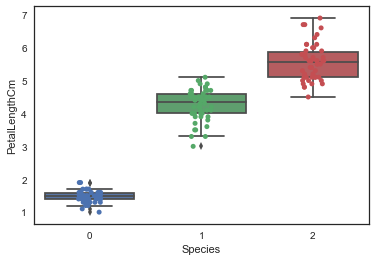

In [14]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

### violin图是箱线图和密度分布的一个组合

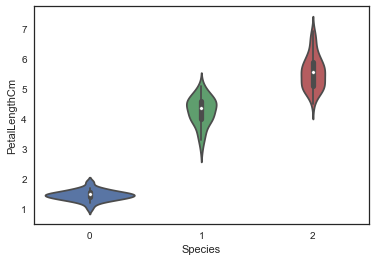

In [15]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

### pairplot, 默认对角线上是直方图，表示每对特征的二元关系

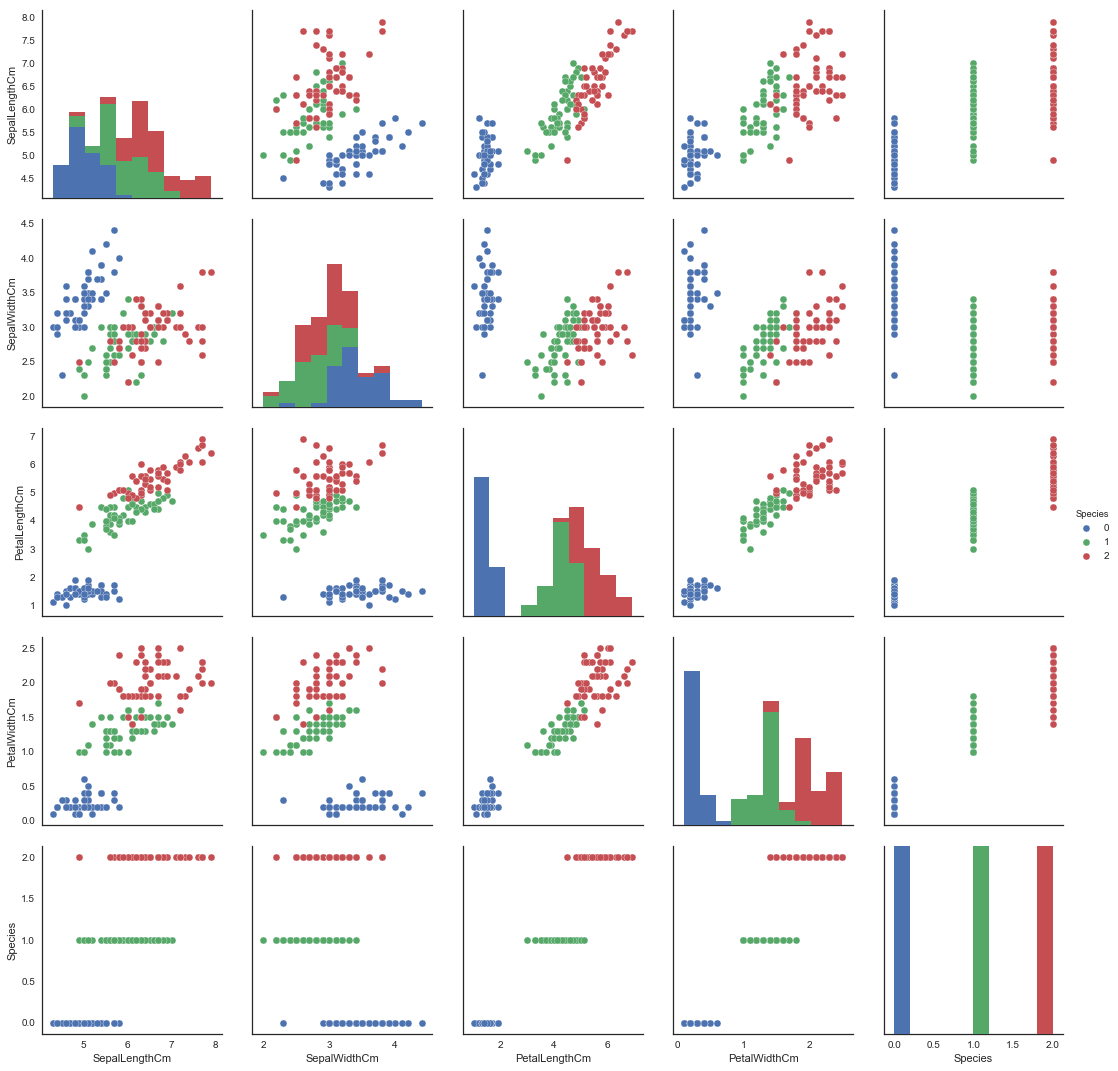

In [20]:
sns.pairplot(iris.drop("id", axis=1), hue="Species", size=3)

### 使用Pandas快速画出箱线图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BAFA35048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020BB0E916A0>]], dtype=object)

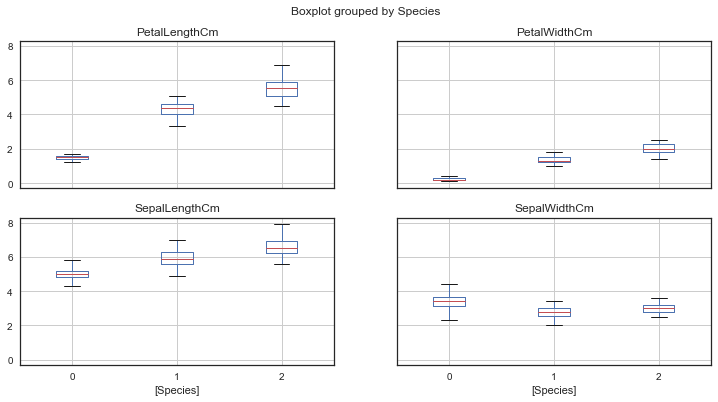

In [21]:
iris.drop("id", axis=1).boxplot(by="Species", figsize=(12, 6))

### Andrews Curves
### 调和曲线图，可以发现同一品种鸢尾花数据的调和曲线图基本上扭在一起
#### 是根据三角变换方法将 p 维空间的点映射到二维平面上的曲线上

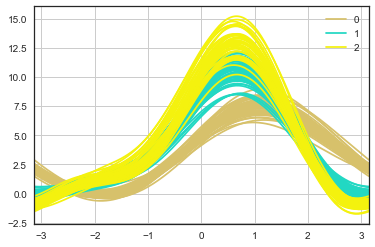

In [22]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("id", axis=1), "Species")

### parallel_coordinates
### 每个特征画一列，连接线

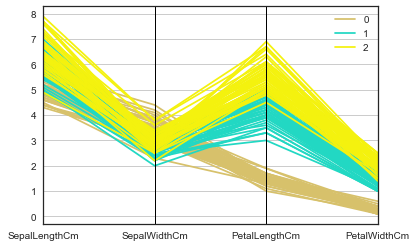

In [23]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("id", axis=1), "Species")